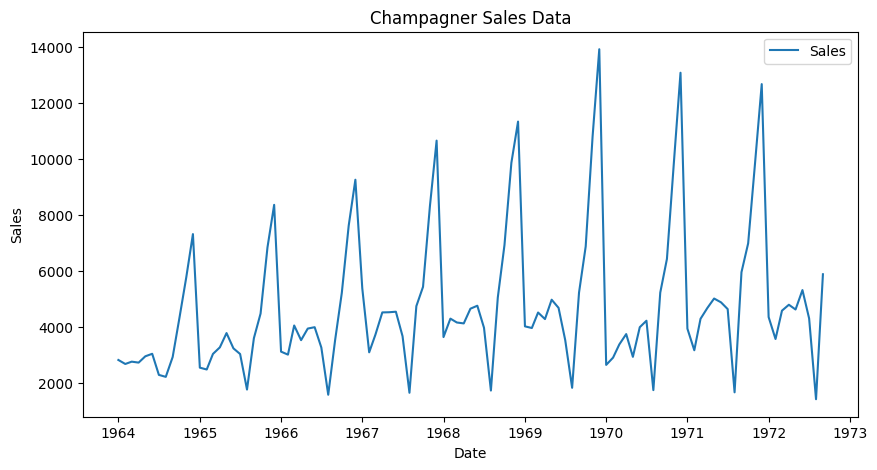

ADF Statistic: -1.8335930563276175
p-value: 0.3639157716602477
The series is non-stationary.


c:\Users\puroh\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\puroh\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\puroh\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\puroh\AppData\Local\Temp\ipykernel_27424\1774144079.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(champagner_data.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='orange')


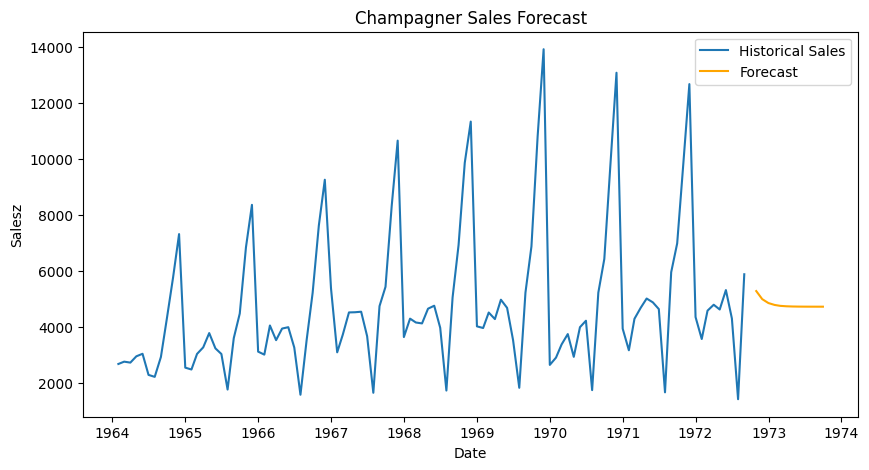

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = r'data\champagner.csv'  # Adjust the file path if necessary
champagner_data = pd.read_csv(file_path)
champagner_data.columns = ['Date','Sales']
# Preprocessing
def preprocess_data(data):
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' column is datetime
    data.set_index('Date', inplace=True)  # Set 'Date' as index
    data = data.sort_index()  # Ensure data is sorted by date
    data = data.dropna()  # Drop missing values
    return data

champagner_data = preprocess_data(champagner_data)

# Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(champagner_data['Sales'], label='Sales')
plt.title('Champagner Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ADF Test for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

adf_test(champagner_data['Sales'])

# Differencing if necessary
def difference_data(data):
    data['Sales_diff'] = data['Sales'].diff().dropna()
    return data.dropna()

if adfuller(champagner_data['Sales'])[1] > 0.05:
    champagner_data = difference_data(champagner_data)

# ARIMA Model and Forecasting
model = ARIMA(champagner_data['Sales'], order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot historical and forecasted data
plt.figure(figsize=(10, 5))
plt.plot(champagner_data['Sales'], label='Historical Sales')
plt.plot(pd.date_range(champagner_data.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='orange')
plt.title('Champagner Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## The Above Sales Data shows Seasonality pattern we can also use SARIMA for seasonal parameters as show below to get seasonal patterns,

c:\Users\puroh\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\puroh\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\puroh\AppData\Local\Temp\ipykernel_27424\4287274985.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(champagner_data.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='orange')


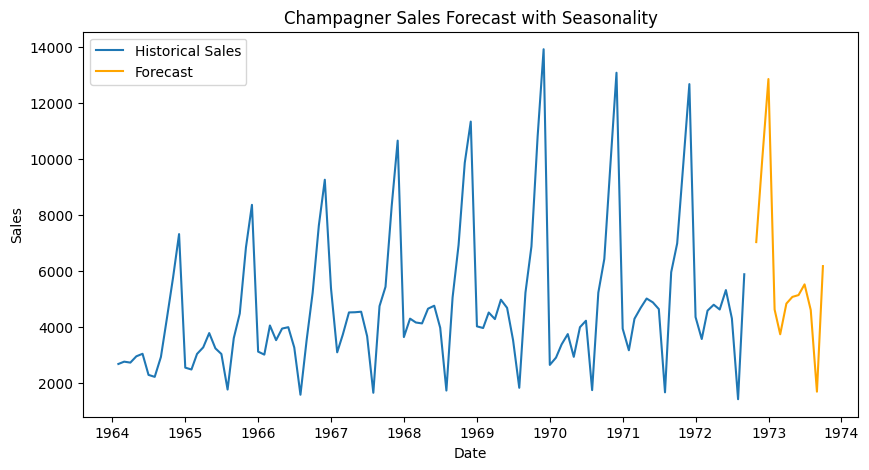

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Model and Forecasting
seasonal_order = (1, 1, 1, 12)  # Adjust seasonal parameters as needed
model = SARIMAX(champagner_data['Sales'], order=(1, 1, 1), seasonal_order=seasonal_order)
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot historical and forecasted data
plt.figure(figsize=(10, 5))
plt.plot(champagner_data['Sales'], label='Historical Sales')
plt.plot(pd.date_range(champagner_data.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='orange')
plt.title('Champagner Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
